## Machine Intelligence II (Infomax - Natural Gradient)

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#### 5.1 Initialisation

In [6]:
sound1 = np.loadtxt('sound1.dat')
sound2 = np.loadtxt('sound2.dat')
s = np.vstack((sound1,sound2))

In [12]:
N = 2
np.random.seed(42)
A = np.random.uniform(size=(N,N))
if np.linalg.det(A) == 0: print('Not to be used!') #Verify randomly generated matrix is not invertible
x_temp = A @ s # Mixing signals
x = np.random.permutation(x_temp.T).T #Removing temporal structure
l = len(sound1)
W0 = np.random.uniform(size=(N,N))
x_0 = (x.T - np.mean(x,axis=1)).T #Centre data to zero mean

#### 5.2 Optimisation

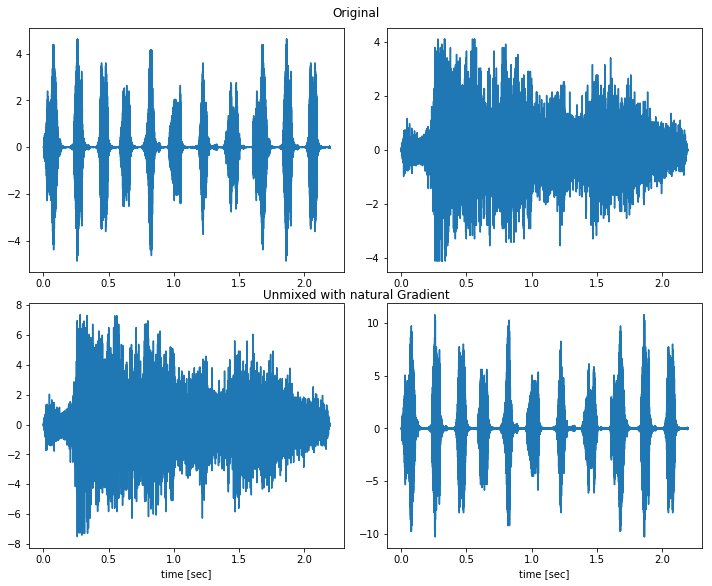

In [13]:
def ICAnatGrad(x, N, num_iter, W0, eta=0.01):
    '''
    Apply online ICA using the natural gradient
    Arguments:
    x -- observations
    N -- number of sources
    num_iter -- number of iterations
    W0 -- initial weight matrix
    eta -- initial learning rate (default: 0.01)
    imag -- the imaginary part (default 0.0)
    returns:
    W (final weight matrix)
    '''
    sigmoid = lambda x: 1. / (1.+np.exp(-x))
    W = np.copy(W0)
    for t in range(num_iter):
        x_a = x[:,t]
        dw_ij = np.zeros(W.shape)
        _I = np.eye(2)
        for i in range(W.shape[0]):
            for j in range(W.shape[1]):
                wk = np.dot(W[i,:], x_a)
                for l in range(_I.shape[0]):
                    dil = _I[i,l]
                    dw_ij[i,j] += (dil + (1.-2.*sigmoid(wk))*np.dot(W[l,:], x_a)) * W[l,j]
        W += eta * dw_ij
        eta = 0.9999*eta # decaying learning rate
    return W
eta = 0.01
W_nat = ICAnatGrad(x_0, N, l, W0, eta)
unmix2 = W_nat @ x_temp

fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(10,8))

fig.text(.5, 1, 'Original', ha='center', va='center', size =12)
t = np.arange(0,len(sound1))/8192.
axes[0,0].plot(t, sound1)
axes[0,1].plot(t, sound2)

fig.text(.5, 0.51, 'Unmixed with natural Gradient', ha='center', va='center', size=12)
# fig.suptitle('Unmixed with natural Gradient', size =12)
axes[1,0].plot(t, unmix2.T[:,0])
axes[1,1].plot(t, unmix2.T[:,1])
axes[1,0].set_xlabel('time [sec]')
axes[1,1].set_xlabel('time [sec]')
plt.tight_layout()
plt.show()